<a href="https://colab.research.google.com/github/Dmitriy6655/-python-DS-ITOGOVAYA/blob/main/sem_10_itog_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Урок 10. Практическое применение метода K-Means. Иерархическая кластеризация
Цель: Проанализировать данные о заработной плате сотрудников из файла ds_salaries.csv и построить модели машинного обучения для прогнозирования заработной платы.

Задачи:

1. Первичный анализ данных:
— Импортировать данные из файла ds_salaries.csv.
— Очистить данные от дубликатов и пропущенных значений.
— Исследовать типы данных, описательную статистику и корреляции между признаками.
— Визуализировать данные с помощью Matplotlib и Seaborn.

2. Построение модели линейной регрессии:
— Разделить данные на обучающую и тестовую выборки.
— Построить модель линейной регрессии для прогнозирования заработной платы.
— Оценить качество модели с помощью метрик MAE, MSE и R-квадрат.
— Проанализировать значимость признаков и мультиколлинеарность.

3. Построение модели дерева решений:
— Построить модель дерева решений для прогнозирования заработной платы.
— Оценить качество модели с помощью метрик RMSE и R-квадрат.
— Подберите гиперпараметры для модели дерево решений
— Визуализировать дерево решений.

4. Построение ансамблевой модели:
— Построить ансамблевую модель, используя Random Forest и Boosting.
— Сравнить качество ансамблевой модели с отдельными моделями.
— Оценить важность признаков в ансамблевой модели.

5. Понижение размерности:
— Применить Principal Component Analysis (PCA) для снижения размерности данных.
— Построить модель линейной регрессии с использованием данных, полученных после PCA.
— Сравнить качество модели с использованием исходных данных.

7. Кластеризация:
— Применить метод K-Means для кластеризации данных по заработной плате.
— Определить оптимальное количество кластеров.
— Проанализировать характеристики полученных кластеров.
— Визуализировать результаты кластеризации и проанализировать характеристики в каждом кластере.
— Проанализируйте полученные данные и сделайте выводы о том, какой алгоритм кластеризации сможет выделить кластеры лучше, чем K-Means.

Информация о наборе данных:



*   work_year - год основания компании;
*   experience_level - уровень опыта;
* employment type - тип занятости;
* job_title -должность;
* salary - уровень ЗП;
* salary_currency - валюта ЗП;
* salary_in_usd - ЗП в USD;
* employee_residence - служебное жилье;
* remote_ratio - удаленная работа;
* company_location - месторасположение компании;
* company_size - индекс количества сотрудников в комапнии.











Импортировать данные из файла ds_salaries.csv.

In [4]:
 pip install bayesian-optimization

In [5]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from bayes_opt import BayesianOptimization


###Первичный анализ

Посмотрим первые 5 строк данных:

In [6]:
df = pd.read_csv('ds_salaries.csv')

In [7]:
ds_salaries = pd.read_csv('ds_salaries.csv')
ds_salaries.head()


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


Загружаем данные и удаляем выбросы:

In [8]:
ds_salaries.info()
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, 'work_year')
df = remove_outliers(df, 'salary')
df = remove_outliers(df, 'salary_in_usd')

df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3745,2021,SE,FT,Director of Data Science,168000,USD,168000,JP,0,JP,S
3746,2021,MI,FT,Data Scientist,160000,SGD,119059,SG,100,IL,M
3748,2021,MI,FT,Data Engineer,24000,EUR,28369,MT,50,MT,L
3749,2021,SE,FT,Data Specialist,165000,USD,165000,US,100,US,L


Убедимся что нет пропусков данных:

In [9]:
df.isna().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


1. Данны состоят из 3755 наблюдений
(строк) и 11 переменных (столбцов).
2. Переменные состоят из следюущих типов: 4 целочисленных типа данных и 7 объектов.
3. Нет пропущенных значений в данных, так как для каждой переменной количество non-null значений равно общему количеству наблюдений (3755).
4. Переменная 'salary' является целевой переменной (зависимой переменной), которую нужно предсказывать или анализировать в зависимости от других переменных.
5. Переменные 'work_year', 'salary_in_usd', 'remote_ratio' представляют собой категориальные переменные, так как имеют целочисленный тип данных.


###Статистические характеристики признаков

 df.describe().T - функция транспонирования сводной статистики в библиотеке Pandas.

Она позволяет поменять оси местами, и по горизонтали будут уже статистические параметры.

In [10]:
ds_salaries.describe().T.style.background_gradient(cmap='YlGnBu')

,count,mean,std,min,25%,50%,75%,max
work_year,3755.000000,2022.373635,0.691448,2020.000000,2022.000000,2022.000000,2023.000000,2023.000000
salary,3755.000000,190695.571771,671676.500508,6000.000000,100000.000000,138000.000000,180000.000000,30400000.000000
salary_in_usd,3755.000000,137570.389880,63055.625278,5132.000000,95000.000000,135000.000000,175000.000000,450000.000000
remote_ratio,3755.000000,46.271638,48.589050,0.000000,0.000000,0.000000,100.000000,100.000000


Выясним количество сотрудников по параметру remote_ratio:

In [11]:
df.remote_ratio.value_counts()

,count
remote_ratio,
0,1860
100,1546
50,141


На основе представленных статистических данных можно сделать следующие выводы:
1. Средняя ЗП сотрудников составляет 137570 USD, минимальная 5132 USD, максимальная 450000 USD.Половина сотрудникков имею ЗП в диапазоне от 95000 USD до 175000 USD.
2. Более 50 % (1860) сотрудников компании работают только удаленно.Около 5% (141) сотрудников работают и удаленно и в офисе.Остальные сотрудники (1546) работают только в офисе.


###Exploratory Data Analysis (EDA) Исследовательский анализ данных

Посмотрим количество уникальных значений в параметрах:

In [12]:
pd.concat([df.dtypes, df.nunique()], axis=1).rename(columns={0: "Type", 1: "Number of unique"})

,Type,Number of unique
work_year,int64,3
experience_level,object,4
employment_type,object,4
job_title,object,87
salary,int64,712
salary_currency,object,12
salary_in_usd,int64,897
employee_residence,object,74
remote_ratio,int64,3
company_location,object,67


Визуализируем данные:

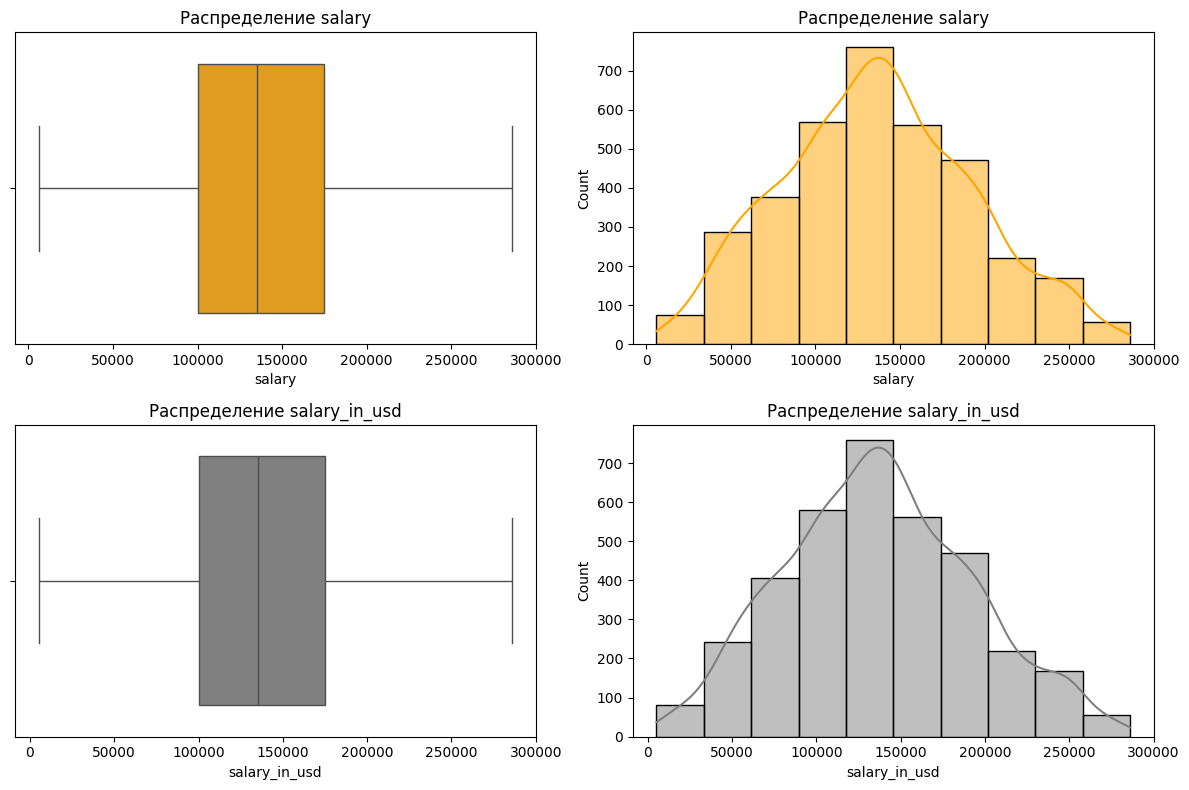

In [13]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['salary'], color='orange')
plt.title('Распределение salary')

plt.subplot(2, 2, 2)
sns.histplot(df['salary'], bins=10, kde=True, color='orange')
plt.title('Распределение salary')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['salary_in_usd'], color='grey')
plt.title('Распределение salary_in_usd')

plt.subplot(2, 2, 4)
sns.histplot(df['salary_in_usd'], bins=10, kde=True, color='grey')
plt.title('Распределение salary_in_usd')

plt.tight_layout()
plt.show()

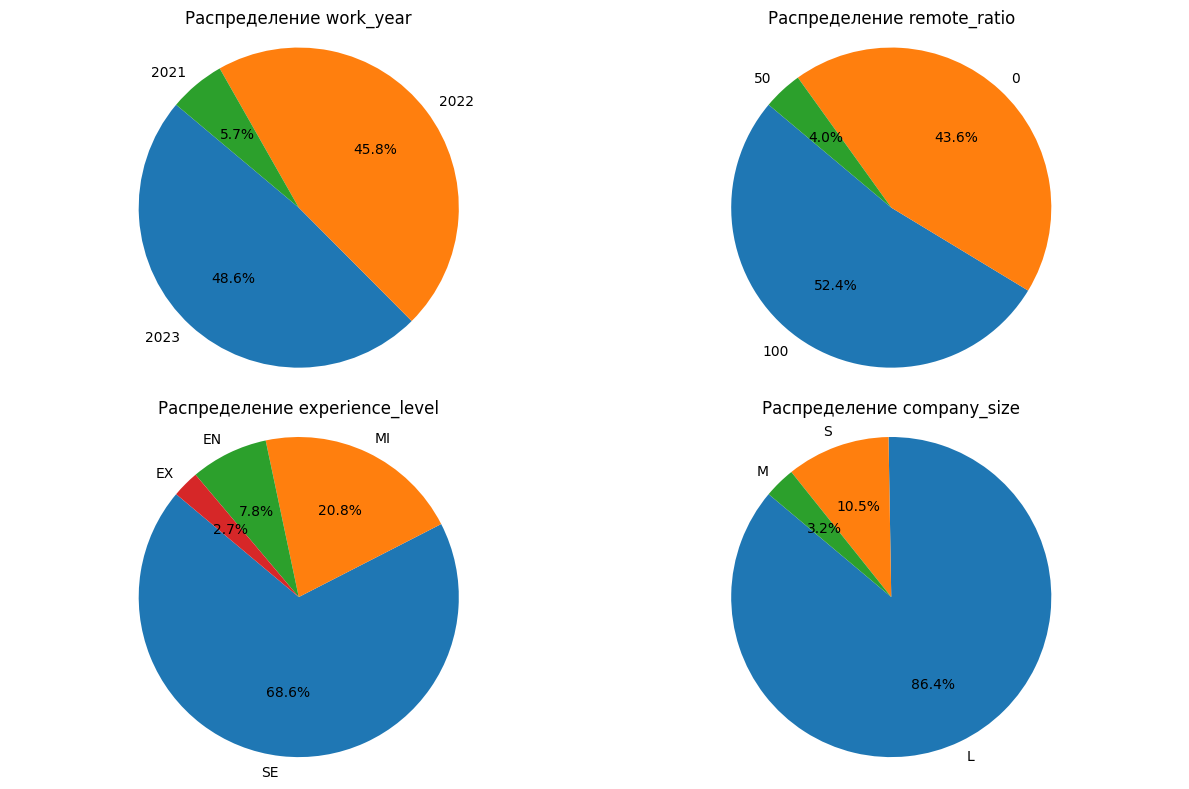

In [14]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.pie(df['work_year'].value_counts(), labels=df['work_year'].unique(),
autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение work_year')

plt.subplot(2, 2, 2)
plt.pie(df['remote_ratio'].value_counts(), labels=df['remote_ratio'].unique(),
autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение remote_ratio')

plt.subplot(2, 2, 3)
plt.pie(df['experience_level'].value_counts(), labels=df['experience_level'].unique(),
autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение experience_level')

plt.subplot(2, 2, 4)
plt.pie(df['company_size'].value_counts(), labels=df['company_size'].unique(),
autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение company_size')

plt.tight_layout()
plt.show()


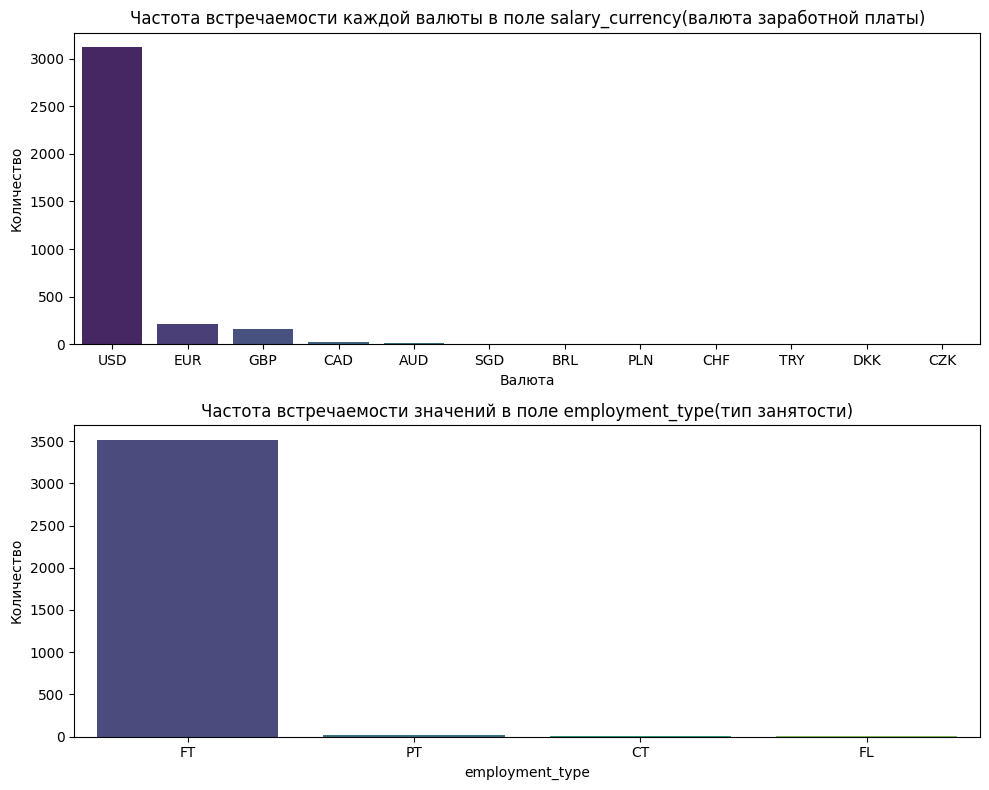

In [15]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.countplot(data=df, x='salary_currency', palette='viridis', order=df['salary_currency'].value_counts().index)
plt.title('Частота встречаемости каждой валюты в поле salary_currency(валюта заработной платы)')
plt.xlabel('Валюта')
plt.ylabel('Количество')

plt.subplot(2, 1, 2)
sns.countplot(data=df, x='employment_type', palette='viridis', order=df['employment_type'].value_counts().index)
plt.title('Частота встречаемости значений в поле employment_type(тип занятости)')
plt.ylabel('Количество')

plt.tight_layout()
plt.show()


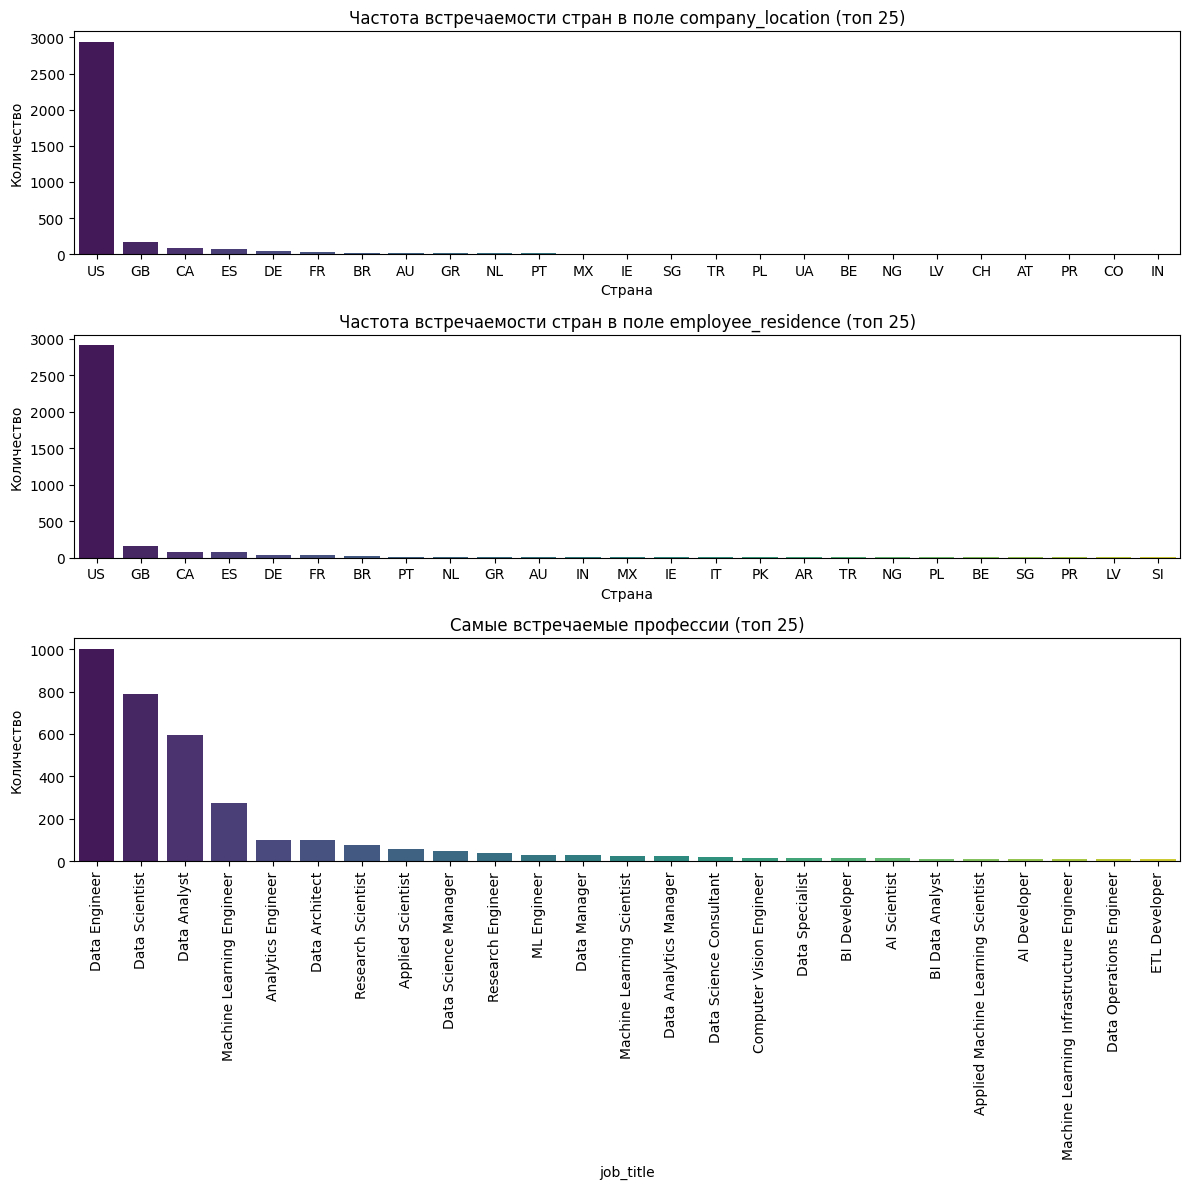

In [16]:
warnings.filterwarnings("ignore")

plt.figure(figsize=(12, 12))

plt.subplot(3, 1, 1)
top_25_countries = df['company_location'].value_counts().nlargest(25).index
sns.countplot(data=df[df['company_location'].isin(top_25_countries)],
              x='company_location',
              palette='viridis',
              order=top_25_countries)

plt.title('Частота встречаемости стран в поле company_location (топ 25)')
plt.xlabel('Страна')
plt.ylabel('Количество')

plt.subplot(3, 1, 2)
top_25_countries = df['employee_residence'].value_counts().nlargest(25).index
sns.countplot(data=df[df['employee_residence'].isin(top_25_countries)],
              x='employee_residence',
              palette='viridis',
              order=top_25_countries)
plt.title('Частота встречаемости стран в поле employee_residence (топ 25)')
plt.xlabel('Страна')
plt.ylabel('Количество')

plt.subplot(3, 1, 3)
top_25_job = df['job_title'].value_counts().nlargest(25).index
sns.countplot(data=df[df['job_title'].isin(top_25_job)],
              x='job_title',
              palette='viridis',
              order=top_25_job)
plt.title('Самые встречаемые профессии (топ 25)')
plt.ylabel('Количество')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

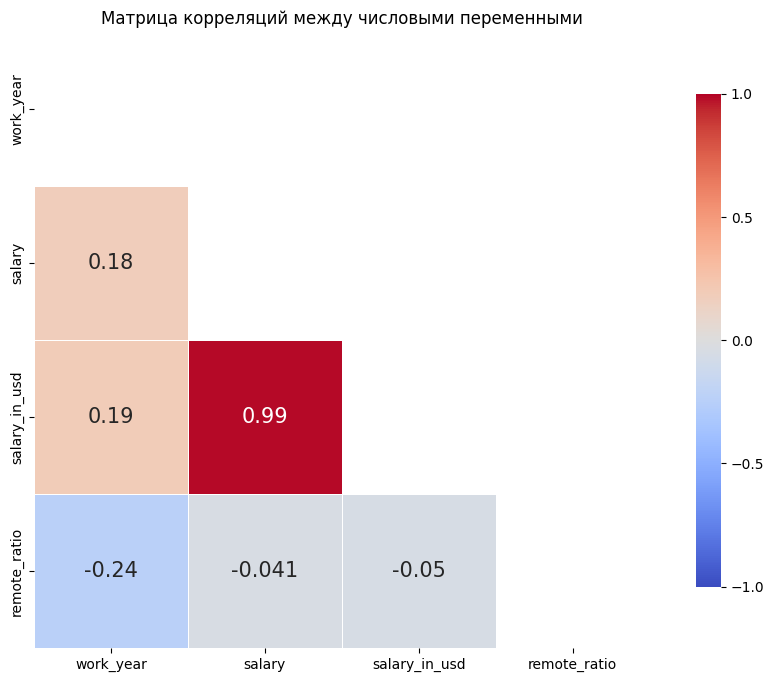

In [17]:
df_numeric = df.select_dtypes(include=['number']).copy()

correlation_matrix = df_numeric.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, mask=mask, cmap='coolwarm', vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot_kws={"size": 15},
            cbar_kws={"shrink": 0.8, "orientation": "vertical", "ticks": [-1, -0.5, 0, 0.5, 1]})
plt.title('Матрица корреляций между числовыми переменными')
plt.show()

###Трансформация признаков

* Удалим поле salary_in_usd из дата-фрейма
* Преобразуем категориальные переменные

In [18]:
df = df.drop(columns=['salary_in_usd'])

# experience_level
df_gender_dummies = pd.get_dummies(df['experience_level'], prefix='experience_level')
df = pd.concat([df, df_gender_dummies], axis=1)
df = df.drop(columns=['experience_level'])

# employment_type
df_BMI_Category = pd.get_dummies(df['employment_type'], prefix='employment_type')
df = pd.concat([df, df_BMI_Category], axis=1)
df = df.drop(columns=['employment_type'])

# salary_currency
df_Sleep_Disorder = pd.get_dummies(df['salary_currency'], prefix='salary_currency')
df = pd.concat([df, df_Sleep_Disorder], axis=1)
df = df.drop(columns=['salary_currency'])

# employee_residence
df_Sleep_Disorder = pd.get_dummies(df['employee_residence'], prefix='employee_residence')
df = pd.concat([df, df_Sleep_Disorder], axis=1)
df = df.drop(columns=['employee_residence'])

# company_location
df_Sleep_Disorder = pd.get_dummies(df['company_location'], prefix='company_location')
df = pd.concat([df, df_Sleep_Disorder], axis=1)
df = df.drop(columns=['company_location'])

# company_size
df_Sleep_Disorder = pd.get_dummies(df['company_size'], prefix='company_size')
df = pd.concat([df, df_Sleep_Disorder], axis=1)
df = df.drop(columns=['company_size'])

# job_title
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['job_title'])
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, df_tfidf], axis=1)
df = df.drop(columns=['job_title'])

df = df.dropna()

df['work_year'] = df['work_year'].astype(int)
df['remote_ratio'] = df['remote_ratio'].astype(int)
df['salary'] = df['salary'].astype(int)

df

,work_year,salary,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,...,researcher,science,scientist,software,specialist,staff,strategist,technician,vehicle,vision
0,2023,80000,100,False,False,False,True,False,False,True,...,0.0,0.000000,0.316926,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2023,30000,100,False,False,True,False,True,False,False,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2023,25500,100,False,False,True,False,True,False,False,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2023,175000,100,False,False,False,True,False,False,True,...,0.0,0.000000,0.877614,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2023,120000,100,False,False,False,True,False,False,True,...,0.0,0.000000,0.877614,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3541,2021,130000,100,False,True,False,False,False,False,True,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3542,2021,110000,100,False,False,True,False,False,False,True,...,0.0,0.447448,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3543,2021,110000,100,False,False,True,False,False,False,True,...,0.0,0.000000,0.877614,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3544,2021,60000,50,True,False,False,False,False,False,True,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Нормализация данных

Нормализация данных нужна для следующих целей:

* <u>Устранение избыточности данных.</u> Избыточность — это повторение данных в разных частях базы данных. Нормализация помогает уменьшить или устранить её, что повышает эффективность и согласованность базы данных.
* <u>Обеспечение согласованности данных.</u> Нормализация помогает предотвратить несоответствия и противоречия, которые могут возникнуть из-за разных версий одних и тех же данных.
* <u>Упрощение управления данными.</u> Разбивая сложную структуру данных на более простые таблицы, нормализация упрощает управление данными, их обновление и извлечение.
* <u>Улучшение общего дизайна базы данных.</u> Организуя данные структурированным и систематическим образом, нормализация упрощает проектирование и обслуживание базы данных.
* <u>Предотвращение аномалий обновления.</u> Нормализация гарантирует, что каждая таблица содержит только один тип данных и что связи между таблицами чётко определены.
* <u>Стандартизация данных.</u> Организуя данные в таблицы и определяя связи между ними, нормализация помогает гарантировать, что данные хранятся согласованным и единообразным образом.

In [19]:
X = df.drop(columns=['salary'])
y = df['salary']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

###Кластеризация данных


Под кластеризацией понимается обнаружение естественных группировок в данных.

K-Means (k-средних)

Основная идея метода — итеративное повторение двух шагов:

распределение объектов выборки по кластерам;
пересчёт центров кластеров.
В начале работы алгоритма выбираются
K
K случайных центров в пространстве признаков. Каждый объект выборки относят к тому кластеру, к центру которого объект оказался ближе. Далее центры кластеров пересчитывают как среднее арифметическое векторов признаков всех вошедших в этот кластер объектов (то есть центр масс кластера). Как только мы обновили центры кластеров, объекты заново перераспределяются по ним, а затем можно снова уточнить положение центров. Процесс продолжается до тех пор, пока центры кластеров не перестанут меняться.


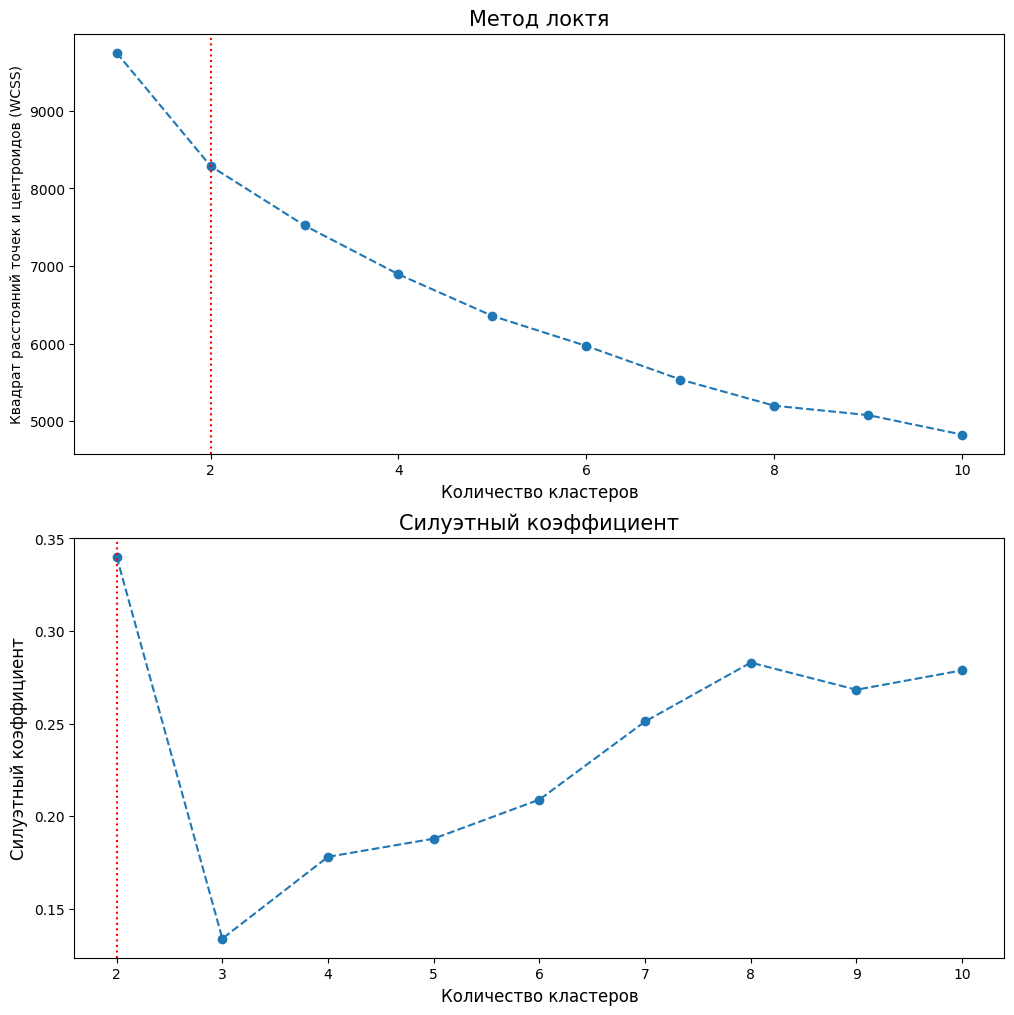

In [20]:
plt.figure(figsize=(12, 12))

# Метод локтя
wcss = []
for i in range(1, 11):
    # k-means++ — улучшенная версия случайной инициализации центроидов.
    # max_iter=300 - максимальное количество итераций, которое алгоритм K-Means будет выполнять, пытаясь минимизировать WCSS
    # n_init=10 - количество раз, которое алгоритм будет запускаться с различными начальными центроидами.
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.subplot(2, 1, 1)
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', linewidth=1.5)
plt.axvline(x=2, linestyle=':', color='r')
plt.title('Метод локтя', fontsize=15)
plt.xlabel('Количество кластеров', fontsize=12)
plt.ylabel('Квадрат расстояний точек и центроидов (WCSS)')

# Метод силуэта
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.subplot(2, 1, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--', linewidth=1.5)
plt.axvline(x=2, linestyle=':', color='r')
plt.title('Силуэтный коэффициент', fontsize=15)
plt.xlabel('Количество кластеров', fontsize=12)
plt.ylabel('Силуэтный коэффициент', fontsize=12)

plt.show()

<u>Метод «локтя» в K-Means</u> помогает определить оптимальное количество кластеров путём анализа графика зависимости суммы квадратов расстояний от точек до центроидов от числа кластеров.

На графике ищется точка «излома», где дальнейшее увеличение числа кластеров приводит к незначительному уменьшению суммы квадратов расстояний.
* Метод локтя показывает, что существенный перегиб кривой значений WCSS от количества кластеров происходит при 2-ух кластерах.





<u>Коэффициент силуэта в кластеризации</u> — это величина, которая позволяет оценить степень соответствия построенной кластерной структуры обучающим данным, т.е. оценить качество кластеризации. Иными словами, коэффициент силуэта показывает, насколько каждый объект «похож» на другие объекты в том кластере, в который он был распределен в процессе кластеризации, и «не похож» на объекты из других кластеров. Метод был предложен бельгийским статистиком Питером Руссо в 1987 году.

В основе идеи метода лежит вычисление коэффициентов, которые присваиваются каждому объекту в кластере и образуют так называемый силуэт кластера. Коэффициенты изменяются от -1 до 1. Значения, близкие к 1, указывают на то, что объект является похожим на другие объекты в кластере и не похожим на объекты из других кластеров. Если большинство объектов имеют значения коэффициентов близкими к 1, можно утверждать, что кластерная структура хорошо выражена, и количество кластеров соответствует естественной группировке данных.

* Метод силуэта показывает, что наибольший коэффициент (чем ближе к +1, тем лучше проведна кластеризация) получается при разбиении данных на 2 кластера.

In [21]:
# Обучаем модель KMeans для 2-ух кластеров
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Добавляем метки кластеров (0 или 1) в признаки как
X = pd.DataFrame(X_scaled, columns=X.columns)
X['clusters_kmeans'] = clusters

# Размеры кластеров
print(f"Распределение по выделенным кластерам: \n{X['clusters_kmeans'].value_counts().sort_index()}")

X

Распределение по выделенным кластерам: 
clusters_kmeans
0     553
1    2865
Name: count, dtype: int64


,work_year,remote_ratio,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_CT,employment_type_FL,employment_type_FT,employment_type_PT,...,science,scientist,software,specialist,staff,strategist,technician,vehicle,vision,clusters_kmeans
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.361123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3414,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.496498,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3415,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3416,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


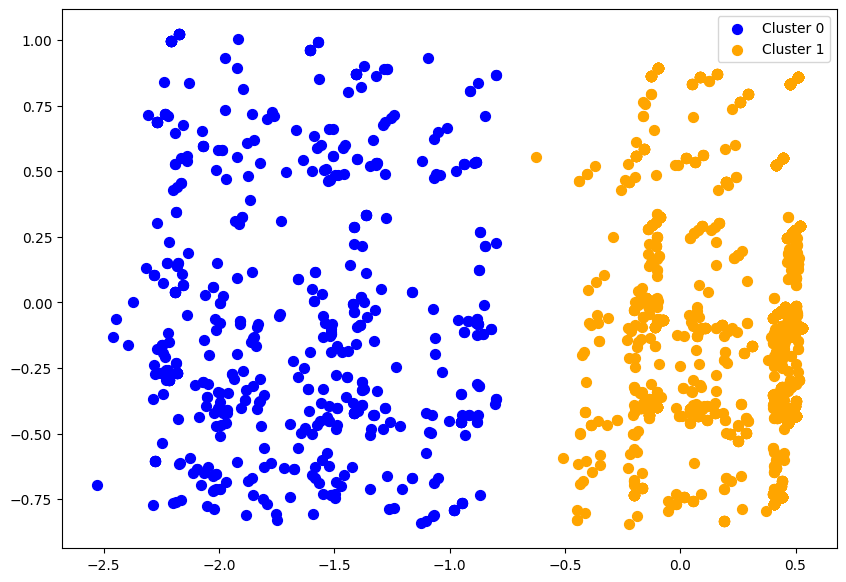

In [22]:
# Выделяем 2 главных признака для графика
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['cluster'] = clusters

plt.figure(figsize=(10, 7))
colors = ['blue', 'orange']
for i in range(optimal_clusters):
    cluster_data = X_pca_df[X_pca_df['cluster'] == i]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                s=50, c=colors[i], label=f'Cluster {i}')

plt.legend()
plt.show()

###DBSCAN
 **DBSCAN** -  это алгоритм кластеризации данных, который предложили Мартин Эстер, Ганс-Петер Кригель, Йёрг Сандер и Сюй Сяовэй в 1996. Это алгоритм кластеризации, основанной на плотности: если дан набор точек в некотором пространстве, алгоритм группирует вместе точки, которые тесно расположены (точки со многими близкими соседями), помечая как выбросы точки, которые находятся одиноко в областях с малой плотностью (ближайшие соседи которых лежат далеко).
  DBSCAN не только может правильно выделить кластеры сложной формы, но также отлично обнаруживает шум. Он собирает "плотно сгруппированные» точки данных в один кластер. Самая интересная особенность кластеризации DBSCAN заключается в том, что она устойчива к Выбросам (Outlier). Также не требуется указывать количество кластеров заранее.
  
 DBSCAN требует только два параметра: epsilon (радиус круга, который должен быть создан вокруг каждой точки данных для проверки плотности) и minPoints (минимальное количество точек данных, необходимых внутри этого круга для того, чтобы эта точка данных была классифицирована как базовая).

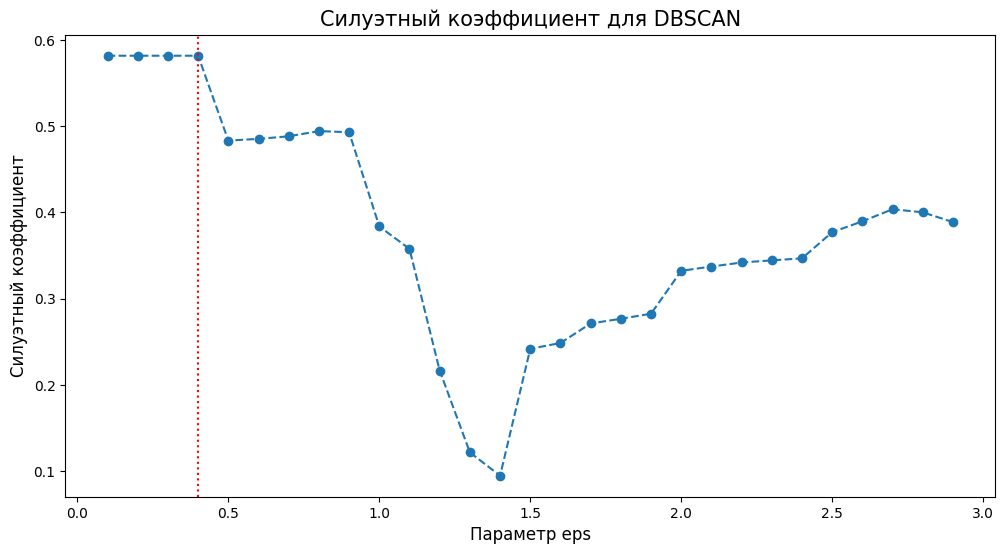

In [23]:
# Силуэтный коэффициент для различных параметров eps - максимальное расстояние между двумя точками, чтобы они считались соседями
eps_values = np.arange(0.1, 3, 0.1)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    clusters = dbscan.fit_predict(X_scaled)
    if len(set(clusters)) > 1:
        score = silhouette_score(X_scaled, clusters)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)  # Если один кластер, силуэтный коэффициент некорректен

plt.figure(figsize=(12, 6))
plt.plot(eps_values, silhouette_scores, marker='o', linestyle='--', linewidth=1.5)
plt.axvline(x=0.4, linestyle=':', color='r')
plt.title('Силуэтный коэффициент для DBSCAN', fontsize=15)
plt.xlabel('Параметр eps', fontsize=12)
plt.ylabel('Силуэтный коэффициент', fontsize=12)
plt.show()

<u>Параметр eps</u> - определяет окрестности вокруг точки данных, т.е. если расстояние между двумя точками меньше или равно "eps", то они считаются соседними. Если значение eps выбрано слишком малым, то большая часть данных будет рассматриваться как выброс. Если оно выбрано очень большим, то кластеры объединятся, и большинство точек данных будут находиться в одних и тех же кластерах. Один из способов определения значения eps основан на графике k-расстояния.

In [24]:
# Обучаем модель DBSCAN с оптимальным значением eps
optimal_eps = 0.4
dbscan = DBSCAN(eps=optimal_eps, min_samples=100)
clusters = dbscan.fit_predict(X_scaled)

# Добавляем метки кластеров в данные
df_dbscan = pd.DataFrame(X_scaled, columns=[f'Feature_{i+1}' for i in range(X_scaled.shape[1])])
df_dbscan['clusters_dbscan'] = clusters

# Размеры кластеров
print(f"Распределение по выделенным кластерам: \n{df_dbscan['clusters_dbscan'].value_counts().sort_index()}")

df_dbscan

Распределение по выделенным кластерам: 
clusters_dbscan
-1    2446
 0     145
 1     219
 2     105
 3     114
 4     123
 5     127
 6     139
Name: count, dtype: int64


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_214,Feature_215,Feature_216,Feature_217,Feature_218,Feature_219,Feature_220,Feature_221,Feature_222,clusters_dbscan
0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,0.361123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
2,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
4,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3414,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.496498,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3415,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1
3416,0.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1


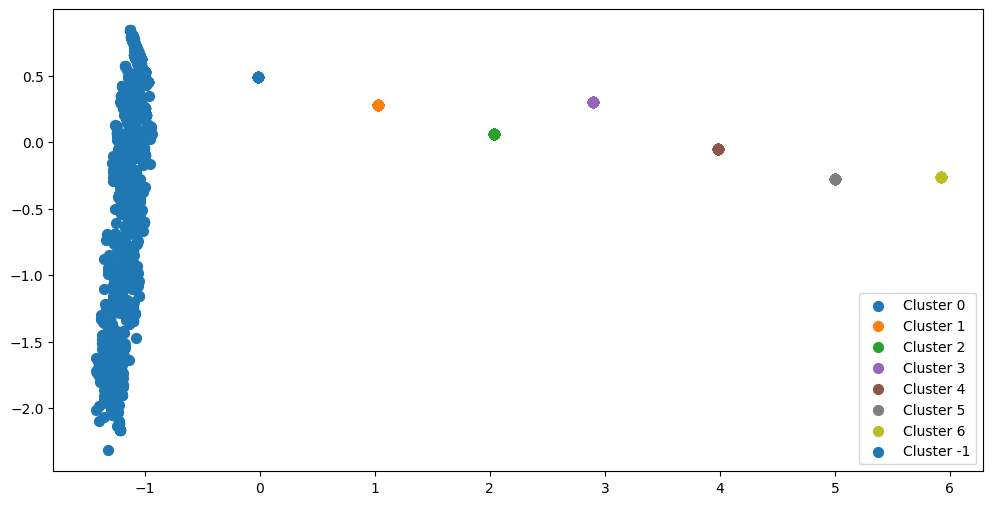

In [25]:
# Выделяем 2 главных признака для графика
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_dbscan)
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['cluster'] = clusters

plt.figure(figsize=(12, 6))
unique_clusters = set(clusters)
colors = plt.cm.get_cmap('tab10', len(unique_clusters))

for cluster in unique_clusters:
    cluster_data = X_pca_df[X_pca_df['cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                s=50, c=np.array([colors(cluster)]), label=f'Cluster {cluster}')

plt.legend()
plt.show()

* Результат кластеризации методом DBSCAN неудовлетворительный, его добавлять к признакам для обучения моделей не нужно.


###Разделение данных на выборки


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер X_train: {X_train.shape}")
print(f"Размер X_test: {X_test.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")


Размер X_train: (2734, 223)
Размер X_test: (684, 223)
Размер y_train: (2734,)
Размер y_test: (684,)


###Отбор признаков с помощью PCA

**PCA** — это статистический метод, который позволяет сократить размерность данных, сохраняя при этом наибольшее количество информации. Он основан на линейной алгебре и математической статистике, и представляет собой мощный инструмент для анализа многомерных данных. Главная идея PCA заключается в том, чтобы найти новые признаки, называемые главными компонентами, которые максимально коррелируют с исходными данными.

In [27]:
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"Размер X_train после PCA: {X_train_pca.shape}")
print(f"Размер X_test после PCA: {X_test_pca.shape}")
print(f"Размер y_train: {y_train.shape}")
print(f"Размер y_test: {y_test.shape}")

Размер X_train после PCA: (2734, 50)
Размер X_test после PCA: (684, 50)
Размер y_train: (2734,)
Размер y_test: (684,)


###Модели линейной регрессии

**Модели линейной регрессии** — это математическая модель, которая описывает связь нескольких переменных. Она представляет собой статистическую процедуру, помогающую прогнозировать будущее.

В зависимости от количества независимых переменных выделяют два типа линейной регрессии:

* Парная (простая). Уравнение: Y = b0 + b1X1, где X1 — независимая переменная, а Y — зависимая переменная. Наклон линии равен b1, а b0 — точка пересечения с осью y.
* Множественная. Уравнение: Y = b0 + b1X1 + b2X2 + … + bnXn, где Xn — независимые переменные, а Y — зависимая переменная. bn — коэффициент наклона для Xn, а b0 — точка пересечения с осью y.




In [28]:
# Обучение модели линейной регрессии на всех признаках
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
r2_train = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)


# Обучение модели линейной регрессии на данных после PCA
lr_pca = LinearRegression()
lr_pca.fit(X_train_pca, y_train)

y_pred_train_pca = lr_pca.predict(X_train_pca)
y_pred_test_pca = lr_pca.predict(X_test_pca)

mae_train_pca = mean_absolute_error(y_train, y_pred_train_pca)
rmse_train_pca = np.sqrt(mean_squared_error(y_train, y_pred_train_pca))
r2_train_pca = r2_score(y_train, y_pred_train_pca)

mae_test_pca = mean_absolute_error(y_test, y_pred_test_pca)
rmse_test_pca = np.sqrt(mean_squared_error(y_test, y_pred_test_pca))
r2_test_pca = r2_score(y_test, y_pred_test_pca)

print("Оценка модели, обученной на всех признаках:")
print(f"MAE (train): {mae_train:.4f}")
print(f"RMSE (train): {rmse_train:.4f}")
print(f"R^2 (train): {r2_train:.4f}")
print(f"MAE (test): {mae_test:.4f}")
print(f"RMSE (test): {rmse_test:.4f}")
print(f"R^2 (test): {r2_test:.4f}")

print("\nОценка модели на признаках, отобранных с помощью PCA:")
print(f"MAE (train): {mae_train_pca:.4f}")
print(f"RMSE (train): {rmse_train_pca:.4f}")
print(f"R^2 (train): {r2_train_pca:.4f}")
print(f"MAE (test): {mae_test_pca:.4f}")
print(f"RMSE (test): {rmse_test_pca:.4f}")
print(f"R^2 (test): {r2_test_pca:.4f}")

results = {
    'Model': ['Linear Regression (All Features)', 'Linear Regression (PCA)'],
    'MAE (Train)': [mae_train, mae_train_pca],
    'RMSE (Train)': [rmse_train, rmse_train_pca],
    'R^2 (Train)': [r2_train, r2_train_pca],
    'MAE (Test)': [mae_test, mae_test_pca],
    'RMSE (Test)': [rmse_test, rmse_test_pca],
    'R^2 (Test)': [r2_test, r2_test_pca]
}

score_df = pd.DataFrame(results)

Оценка модели, обученной на всех признаках:
MAE (train): 34390.1185
RMSE (train): 43605.5263
R^2 (train): 0.3787
MAE (test): 2637545080878164.5000
RMSE (test): 36446067967250280.0000
R^2 (test): -414756848644913371283456.0000

Оценка модели на признаках, отобранных с помощью PCA:
MAE (train): 35435.6448
RMSE (train): 44441.4951
R^2 (train): 0.3546
MAE (test): 37128.9277
RMSE (test): 46323.9405
R^2 (test): 0.3300


* Как мы видим более лучше себя показала модель на тесте с признаками, отобранными с помощью PCA.
* В модели обученной на всех признаках метрики ошибок лучше на тренировочной выборке, но очень большие на тесте - модель не научились обощать информацию.
* Для признаков после PCA мультиколлинеарность не требуется анализа, так как компоненты PCA ортогональны друг другу

###Анализ значимости признаков

In [29]:
X_train_with_const = add_constant(X_train)
vif = pd.DataFrame()
vif['Feature'] = X_train_with_const.columns
vif['VIF'] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]
print("\nАнализ мультиколлинеарности для исходных признаков:")
print(vif)


Анализ мультиколлинеарности для исходных признаков:
                 Feature           VIF
0                  const  0.000000e+00
1              work_year  1.240725e+00
2           remote_ratio  1.145699e+00
3    experience_level_EN  2.764651e+07
4    experience_level_EX           inf
..                   ...           ...
219           strategist  1.932228e+00
220           technician           inf
221              vehicle           inf
222               vision           inf
223      clusters_kmeans  1.859247e+02

[224 rows x 2 columns]


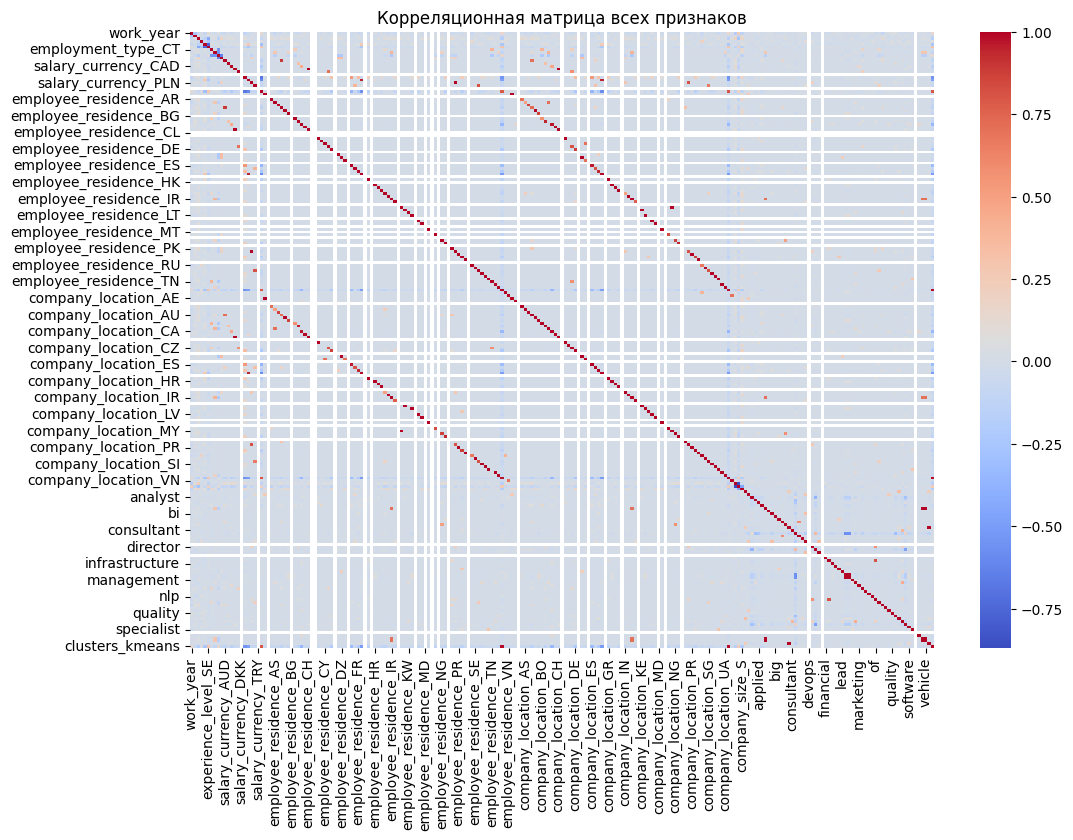

In [30]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=False, cmap='coolwarm')
plt.title("Корреляционная матрица всех признаков")
plt.show()

###Модели деревьев решений

In [31]:
# Обучение модели дерева решений на всех признаках
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

mae_train_dt = mean_absolute_error(y_train, y_pred_train_dt)
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_pred_train_dt))
r2_train_dt = r2_score(y_train, y_pred_train_dt)

mae_test_dt = mean_absolute_error(y_test, y_pred_test_dt)
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_pred_test_dt))
r2_test_dt = r2_score(y_test, y_pred_test_dt)

print("Оценка модели дерева решений, обученной на всех признаках:")
print(f"MAE (train): {mae_train_dt:.4f}")
print(f"RMSE (train): {rmse_train_dt:.4f}")
print(f"R^2 (train): {r2_train_dt:.4f}")
print(f"MAE (test): {mae_test_dt:.4f}")
print(f"RMSE (test): {rmse_test_dt:.4f}")
print(f"R^2 (test): {r2_test_dt:.4f}")


# Обучение модели дерева решений на данных после PCA
dt_pca = DecisionTreeRegressor(random_state=42)
dt_pca.fit(X_train_pca, y_train)

y_pred_train_dt_pca = dt_pca.predict(X_train_pca)
y_pred_test_dt_pca = dt_pca.predict(X_test_pca)

mae_train_dt_pca = mean_absolute_error(y_train, y_pred_train_dt_pca)
rmse_train_dt_pca = np.sqrt(mean_squared_error(y_train, y_pred_train_dt_pca))
r2_train_dt_pca = r2_score(y_train, y_pred_train_dt_pca)

mae_test_dt_pca = mean_absolute_error(y_test, y_pred_test_dt_pca)
rmse_test_dt_pca = np.sqrt(mean_squared_error(y_test, y_pred_test_dt_pca))
r2_test_dt_pca = r2_score(y_test, y_pred_test_dt_pca)

print("\nОценка модели дерева решений на признаках, отобранных с помощью PCA:")
print(f"MAE (train): {mae_train_dt_pca:.4f}")
print(f"RMSE (train): {rmse_train_dt_pca:.4f}")
print(f"R^2 (train): {r2_train_dt_pca:.4f}")
print(f"MAE (test): {mae_test_dt_pca:.4f}")
print(f"RMSE (test): {rmse_test_dt_pca:.4f}")
print(f"R^2 (test): {r2_test_dt_pca:.4f}")

results = {
    'Model': ['Decision Tree (All Features)', 'Decision Tree (PCA)'],
    'MAE (Train)': [mae_train_dt, mae_train_dt_pca],
    'RMSE (Train)': [rmse_train_dt, rmse_train_dt_pca],
    'R^2 (Train)': [r2_train_dt, r2_train_dt_pca],
    'MAE (Test)': [mae_test_dt, mae_test_dt_pca],
    'RMSE (Test)': [rmse_test_dt, rmse_test_dt_pca],
    'R^2 (Test)': [r2_test_dt, r2_test_dt_pca]
}
new_df = pd.DataFrame(results)
score_df = pd.concat([score_df, new_df], ignore_index=True)

Оценка модели дерева решений, обученной на всех признаках:
MAE (train): 28225.5944
RMSE (train): 38912.3856
R^2 (train): 0.5052
MAE (test): 39679.5944
RMSE (test): 49951.4484
R^2 (test): 0.2209

Оценка модели дерева решений на признаках, отобранных с помощью PCA:
MAE (train): 28225.5944
RMSE (train): 38912.3856
R^2 (train): 0.5052
MAE (test): 39287.7967
RMSE (test): 49221.7155
R^2 (test): 0.2435


* Чуть более лучший результат у модели обученной на признаках, отобранных с помощью PCA.

###Визуализация

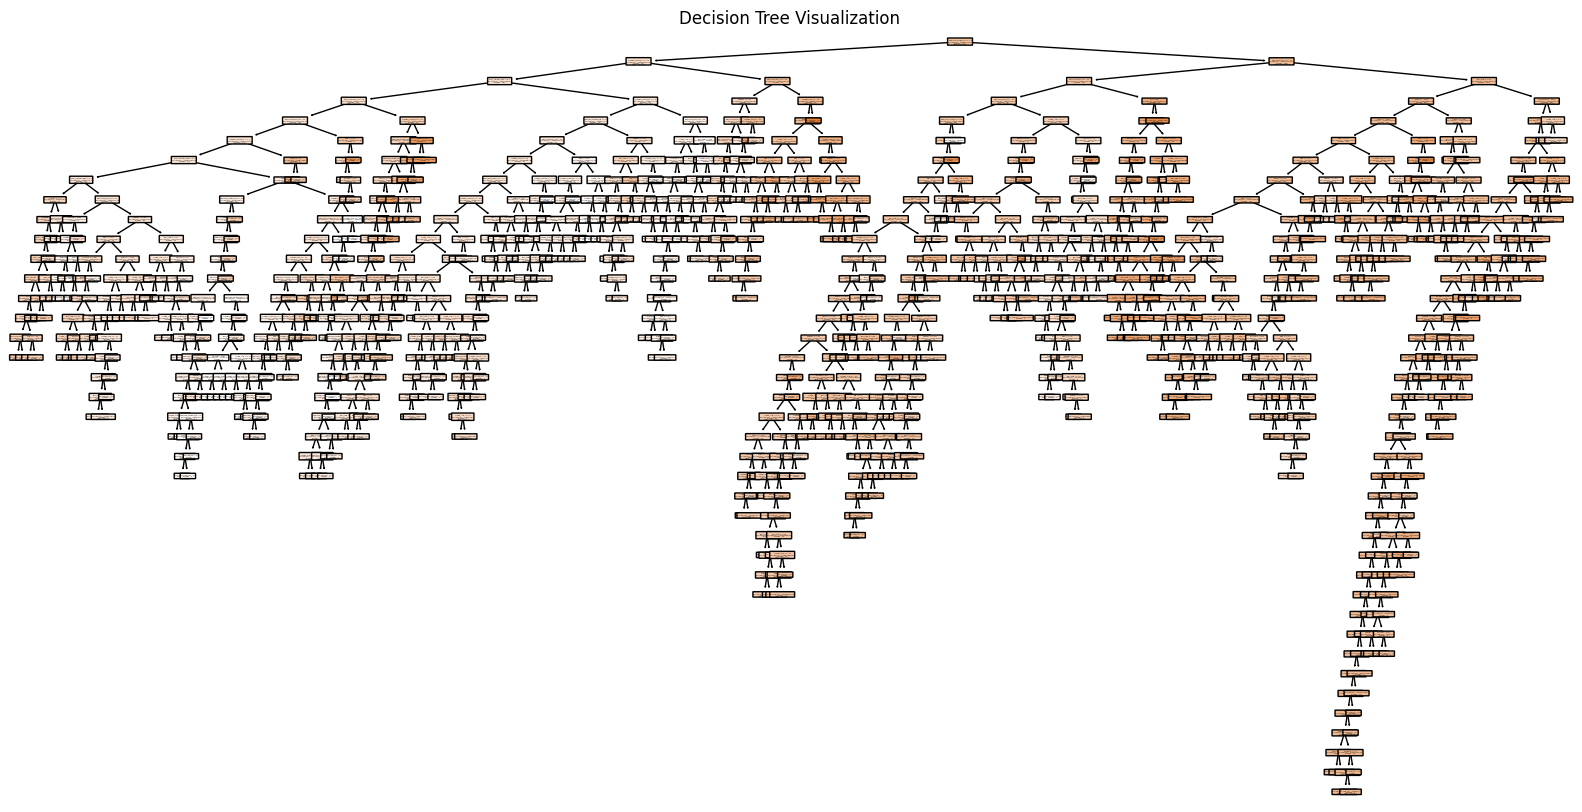

In [32]:
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X_train.columns, rounded=True, class_names=["Class 0", "Class 1"])
plt.title("Decision Tree Visualization")
plt.show()

###Модели Random Forest

In [33]:
# Обучение модели случайного леса на всех признаках
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

mae_train_rf = mean_absolute_error(y_train, y_pred_train_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_pred_train_rf))
r2_train_rf = r2_score(y_train, y_pred_train_rf)

mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_pred_test_rf))
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print("Оценка модели случайного леса, обученной на всех признаках:")
print(f"MAE (train): {mae_train_rf:.4f}")
print(f"RMSE (train): {rmse_train_rf:.4f}")
print(f"R^2 (train): {r2_train_rf:.4f}")
print(f"MAE (test): {mae_test_rf:.4f}")
print(f"RMSE (test): {rmse_test_rf:.4f}")
print(f"R^2 (test): {r2_test_rf:.4f}")


# Обучение модели случайного леса на данных после PCA
rf_pca = RandomForestRegressor(random_state=42)
rf_pca.fit(X_train_pca, y_train)

y_pred_train_rf_pca = rf_pca.predict(X_train_pca)
y_pred_test_rf_pca = rf_pca.predict(X_test_pca)

mae_train_rf_pca = mean_absolute_error(y_train, y_pred_train_rf_pca)
rmse_train_rf_pca = np.sqrt(mean_squared_error(y_train, y_pred_train_rf_pca))
r2_train_rf_pca = r2_score(y_train, y_pred_train_rf_pca)

mae_test_rf_pca = mean_absolute_error(y_test, y_pred_test_rf_pca)
rmse_test_rf_pca = np.sqrt(mean_squared_error(y_test, y_pred_test_rf_pca))
r2_test_rf_pca = r2_score(y_test, y_pred_test_rf_pca)

print("\nОценка модели случайного леса на признаках, отобранных с помощью PCA:")
print(f"MAE (train): {mae_train_rf_pca:.4f}")
print(f"RMSE (train): {rmse_train_rf_pca:.4f}")
print(f"R^2 (train): {r2_train_rf_pca:.4f}")
print(f"MAE (test): {mae_test_rf_pca:.4f}")
print(f"RMSE (test): {rmse_test_rf_pca:.4f}")
print(f"R^2 (test): {r2_test_rf_pca:.4f}")

results = {
    'Model': ['Random Forest (All Features)', 'Random Forest (PCA)'],
    'MAE (Train)': [mae_train_rf, mae_train_rf_pca],
    'RMSE (Train)': [rmse_train_rf, rmse_train_rf_pca],
    'R^2 (Train)': [r2_train_rf, r2_train_rf_pca],
    'MAE (Test)': [mae_test_rf, mae_test_rf_pca],
    'RMSE (Test)': [rmse_test_rf, rmse_test_rf_pca],
    'R^2 (Test)': [r2_test_rf, r2_test_rf_pca]
}
new_df = pd.DataFrame(results)
score_df = pd.concat([score_df, new_df], ignore_index=True)

Оценка модели случайного леса, обученной на всех признаках:
MAE (train): 30343.7355
RMSE (train): 39549.4680
R^2 (train): 0.4889
MAE (test): 37320.4984
RMSE (test): 46831.7489
R^2 (test): 0.3152

Оценка модели случайного леса на признаках, отобранных с помощью PCA:
MAE (train): 30307.4160
RMSE (train): 39518.1622
R^2 (train): 0.4897
MAE (test): 37337.6431
RMSE (test): 46814.8423
R^2 (test): 0.3157


###Отбор наиболее значимых признаков

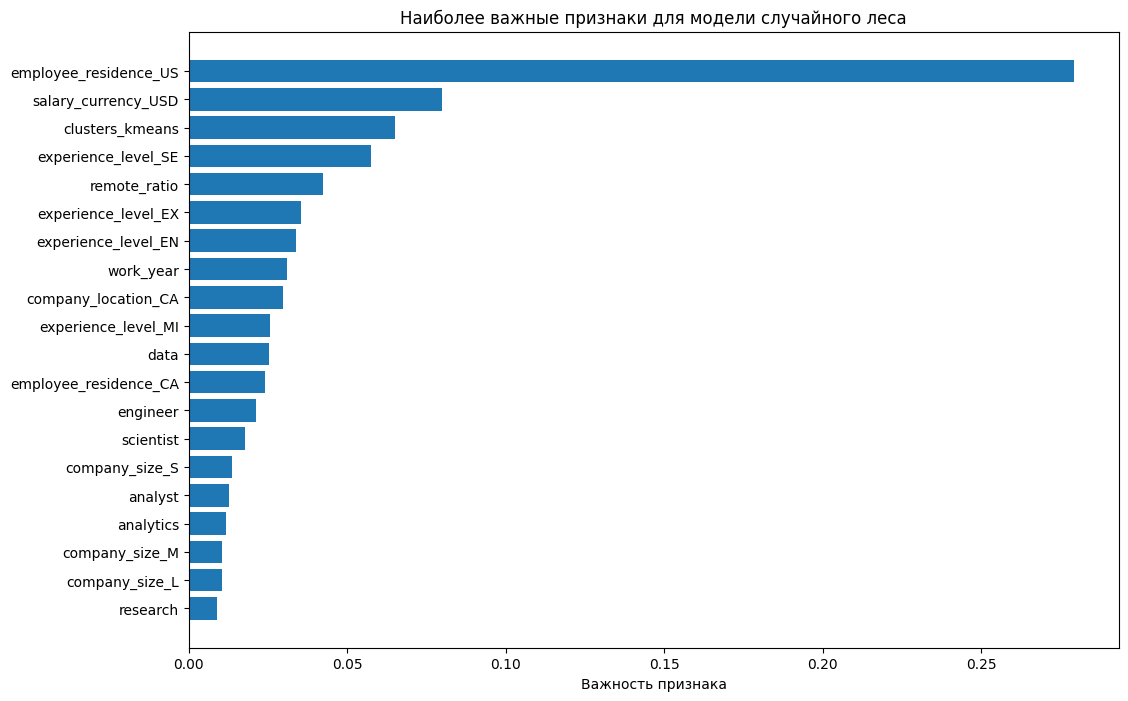

In [34]:
# Обучение модели случайного леса на всех признаках
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Получение важности признаков
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

top_n = 20
top_indices = indices[:top_n]
top_importances = importances[top_indices]
top_feature_names = X_train.columns[top_indices]

plt.figure(figsize=(12, 8))
plt.title("Наиболее важные признаки для модели случайного леса")
plt.barh(range(top_n), top_importances, align="center")
plt.yticks(range(top_n), top_feature_names)
plt.xlabel("Важность признака")
plt.gca().invert_yaxis()  # Инвертировать ось y, чтобы на верхней позиции был наиболее важный признак
plt.show()

###Модели Boosting

In [35]:
# Обучение модели градиентного бустинга на всех признаках
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)

y_pred_train_gbr = gbr.predict(X_train)
y_pred_test_gbr = gbr.predict(X_test)

mae_train_gbr = mean_absolute_error(y_train, y_pred_train_gbr)
rmse_train_gbr = np.sqrt(mean_squared_error(y_train, y_pred_train_gbr))
r2_train_gbr = r2_score(y_train, y_pred_train_gbr)

mae_test_gbr = mean_absolute_error(y_test, y_pred_test_gbr)
rmse_test_gbr = np.sqrt(mean_squared_error(y_test, y_pred_test_gbr))
r2_test_gbr = r2_score(y_test, y_pred_test_gbr)

print("Оценка модели градиентного бустинга, обученной на всех признаках:")
print(f"MAE (train): {mae_train_gbr:.4f}")
print(f"RMSE (train): {rmse_train_gbr:.4f}")
print(f"R^2 (train): {r2_train_gbr:.4f}")
print(f"MAE (test): {mae_test_gbr:.4f}")
print(f"RMSE (test): {rmse_test_gbr:.4f}")
print(f"R^2 (test): {r2_test_gbr:.4f}")


# Обучение модели градиентного бустинга на данных после PCA
gbr_pca = GradientBoostingRegressor(random_state=42)
gbr_pca.fit(X_train_pca, y_train)

y_pred_train_gbr_pca = gbr_pca.predict(X_train_pca)
y_pred_test_gbr_pca = gbr_pca.predict(X_test_pca)

mae_train_gbr_pca = mean_absolute_error(y_train, y_pred_train_gbr_pca)
rmse_train_gbr_pca = np.sqrt(mean_squared_error(y_train, y_pred_train_gbr_pca))
r2_train_gbr_pca = r2_score(y_train, y_pred_train_gbr_pca)

mae_test_gbr_pca = mean_absolute_error(y_test, y_pred_test_gbr_pca)
rmse_test_gbr_pca = np.sqrt(mean_squared_error(y_test, y_pred_test_gbr_pca))
r2_test_gbr_pca = r2_score(y_test, y_pred_test_gbr_pca)

print("\nОценка модели градиентного бустинга на признаках, отобранных с помощью PCA:")
print(f"MAE (train): {mae_train_gbr_pca:.4f}")
print(f"RMSE (train): {rmse_train_gbr_pca:.4f}")
print(f"R^2 (train): {r2_train_gbr_pca:.4f}")
print(f"MAE (test): {mae_test_gbr_pca:.4f}")
print(f"RMSE (test): {rmse_test_gbr_pca:.4f}")
print(f"R^2 (test): {r2_test_gbr_pca:.4f}")

results = {
    'Model': ['Boosting (All Features)', 'Boosting (PCA)'],
    'MAE (Train)': [mae_train_gbr, mae_train_gbr_pca],
    'RMSE (Train)': [rmse_train_gbr, rmse_train_gbr_pca],
    'R^2 (Train)': [r2_train_gbr, r2_train_gbr_pca],
    'MAE (Test)': [mae_test_gbr, mae_test_gbr_pca],
    'RMSE (Test)': [rmse_test_gbr, rmse_test_gbr_pca],
    'R^2 (Test)': [r2_test_gbr, r2_test_gbr_pca]
}
new_df = pd.DataFrame(results)
score_df = pd.concat([score_df, new_df], ignore_index=True)

Оценка модели градиентного бустинга, обученной на всех признаках:
MAE (train): 34213.8574
RMSE (train): 43125.3878
R^2 (train): 0.3923
MAE (test): 36876.9486
RMSE (test): 46155.9659
R^2 (test): 0.3348

Оценка модели градиентного бустинга на признаках, отобранных с помощью PCA:
MAE (train): 32562.5994
RMSE (train): 41380.9213
R^2 (train): 0.4405
MAE (test): 36976.9084
RMSE (test): 46459.1251
R^2 (test): 0.3260
